# Image Preprocessing

This notebook takes the original images (.JPG and .JPEG format) and convert them to numpy arrays. The numpy arrays are called X(images) and y(labels). 

There are two X files, one for the 299x299 size and another for 331x331 size. The files will be called X_299 and X_331.

The y file are the same for both sizes and contains 0 for one cat (Gepetto) and 1 for the other (Kuki).

### Resizing and scaling the image

In this section, we define a function that takes an image path and the desired width and height and returns the final image. The final image is obtained by making the image RGB, resizing it to the desired size and dividing each pixel for 255.

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

def process_img(path, width, height):
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(rgb_img, (width, height))
    final_img = resized_img / 255
    return final_img

Showing an image example using process_img:

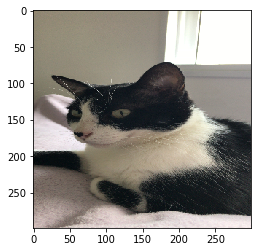

In [10]:
img_path = 'original_data/gepetto/0692AA9A-60C3-4C10-9FE5-ED6E49AF9230.jpg'
img = process_img(img_path, 299, 299)
plt.imshow(img)
plt.show()

### Generating X_299

Here, we use the process_img function to generate the numpy arrays for the (299, 299, 3) size. The array are saved in the processed_data folder.

In [11]:
folders = ['original_data/gepetto/', 'original_data/kuki/']
X, y = [], []

for folder in folders:
    for filename in os.listdir(folder):
        path = folder + filename
        X.append(process_img(path, 299, 299))

X_299 = np.asarray(X)
np.save('processed_data/X_299', X_299)

X_299.shape
print('{} images were processed to the size ({}, {}, {})'.format(X_299.shape[0],X_299.shape[1],
                                                                    X_299.shape[2],X_299.shape[3]))

400 images were processed to the size (299, 299, 3)


### Generating X_331

Here we do the same process as above but for the size of (331, 331, 3)

In [9]:
folders = ['original_data/gepetto/', 'original_data/kuki/']
X, y = [], []

for folder in folders:
    for filename in os.listdir(folder):
        path = folder + filename
        X.append(process_img(path, 331, 331))

X_331 = np.asarray(X)
np.save('processed_data/X_331', X_331)

X_299.shape
print('{} images were processed to the size ({}, {}, {})'.format(X_331.shape[0],X_331.shape[1],
                                                                    X_331.shape[2],X_331.shape[3]))

400 images were processed to the size (331, 331, 3)


### Generating y

Here we generated the y label array. The y is 0 for the first 200 images and then 1 for the remaining images.

In [21]:
y0 = np.zeros((200,))
y1 = np.ones((200,))
y = np.concatenate((y0, y1))
print('y contains {} labels'.format(y.shape[0]))

np.save('processed_data/y', y)

y contains 400 labels
